# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="# Save config information.

# Test query
r = requests.get(query_url+'san diego').json()
r

{'coord': {'lon': -117.16, 'lat': 32.72},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 21.69,
  'feels_like': 23.3,
  'temp_min': 21.11,
  'temp_max': 23,
  'pressure': 1016,
  'humidity': 78},
 'visibility': 16093,
 'wind': {'speed': 1.5, 'deg': 310},
 'clouds': {'all': 20},
 'dt': 1594533900,
 'sys': {'type': 1,
  'id': 5771,
  'country': 'US',
  'sunrise': 1594471765,
  'sunset': 1594522717},
 'timezone': -25200,
 'id': 5391811,
 'name': 'San Diego',
 'cod': 200}

In [4]:
# Data to collect
cities_clean = []
lat = []
lng =[]
max_temp = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []
call = 1
sset = 1

# print formating
print('Beginning Data Retreval')
print('---------------------------')

# core loop: loop through cities list, request weather data for each city. Append lat, lng, max temp, humidity, cloudisness, wind speed, country, and date into seperate lists

for city in cities:
    try:
        response = requests.get(query_url+city).json()
        print(f'Processing Record {call} of Set {sset} | {city}')
        cities_clean.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        if call >= 50:
            call = 1
            sset = sset + 1
        else:
            call = call + 1
    except:
        print('City not found. Skipping...City not found. Skipping...')


print('----------------------------')
print('Data Retreval Complete')
print('----------------------------')


et 1 | ternate
Processing Record 191 of Set 1 | port macquarie
Processing Record 192 of Set 1 | ballina
Processing Record 193 of Set 1 | sumbe
Processing Record 194 of Set 1 | cherskiy
Processing Record 195 of Set 1 | alofi
Processing Record 196 of Set 1 | muros
Processing Record 197 of Set 1 | otane
Processing Record 198 of Set 1 | clyde river
Processing Record 199 of Set 1 | lolua
City not found. Skipping...City not found. Skipping...
Processing Record 200 of Set 1 | hay river
Processing Record 201 of Set 1 | hervey bay
Processing Record 202 of Set 1 | tasquillo
Processing Record 203 of Set 1 | mar del plata
Processing Record 204 of Set 1 | san patricio
Processing Record 205 of Set 1 | avarua
Processing Record 206 of Set 1 | puerto asis
Processing Record 207 of Set 1 | awjilah
Processing Record 208 of Set 1 | chimbote
Processing Record 209 of Set 1 | tautira
Processing Record 210 of Set 1 | lewisporte
Processing Record 211 of Set 1 | ouranopolis
City not found. Skipping...City not fo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    'City': cities_clean,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': clouds,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date,
}

weather_df = pd.DataFrame(weather_dict)
weather_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [28]:
weather_df.to_csv(index=False)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vardø,70.37,31.11,8.15,89,82,7.67,NO,1594534040
1,Port Alfred,-33.59,26.89,10.00,67,14,3.13,ZA,1594534040
2,Barrow,71.29,-156.79,2.00,80,90,4.60,US,1594533832
3,Chui,-33.70,-53.46,5.77,79,78,2.39,UY,1594534041
4,Saint George,37.10,-113.58,34.00,16,1,2.04,US,1594534041


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,5.540000e+02
mean,19.357040,17.599856,20.746697,70.077617,52.709386,3.527726,1.594534e+09
std,33.108275,88.854381,8.057899,20.058128,37.747429,2.234489,6.845440e+01
min,-54.800000,-175.200000,-4.000000,3.000000,0.000000,0.090000,1.594534e+09
25%,-7.575000,-60.880000,14.810000,59.000000,13.000000,1.727500,1.594534e+09
50%,22.575000,20.345000,22.000000,74.000000,61.000000,3.100000,1.594534e+09
75%,46.602500,95.095000,27.000000,86.000000,90.000000,4.905000,1.594534e+09
max,78.220000,179.320000,38.000000,100.000000,100.000000,14.140000,1.594534e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [10]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

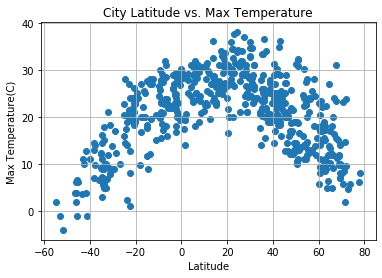

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature(C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("cities_lat_vs_temp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

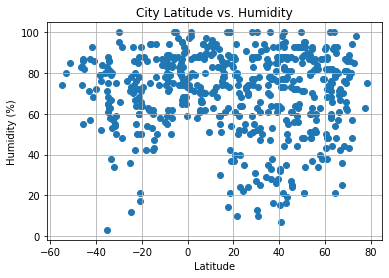

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("cities_lat_vs_hum.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

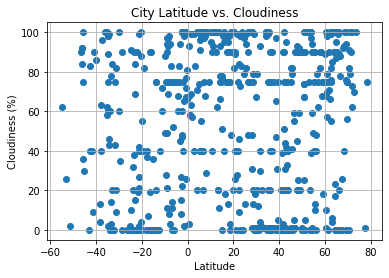

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'],marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("cities_lat_vs_cloud.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

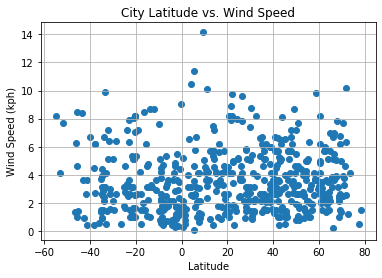

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'],marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (kph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("cities_lat_vs_wind.png")

# Show plot
plt.show()

## Linear Regression

In [50]:
# OPTIONAL: Create a function to create Linear Regression plots
def linReg(x_val,y_val):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val,y_val)
    regress_values = x_val * slope + intercept
    return regress_values

# Create fuction to build scatter plot
def sctplt(x,y,marker='o',title='Title',ylabel='Y Label',xlabel='X Label',grid=True,save=False,linreg=False,rsqr=False):
    '''
    Grid takes str of path to save gridGrid takes str of path to save grid
    '''
    plt.scatter(x,y,marker=marker)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.grid(grid)
    try:
        plt.savefig(save)
    except:
        pass
    if linreg == True:
        regress_values = linReg(x,y)
        plt.plot(x,regress_values,'r-')
    if rsqr == True:
        rsqr = (round(st.pearsonr(x,y)[0],2))
        print(f'The r-squared is: {rsqr}')

In [16]:
# Create Northern and Southern Hemisphere DataFrames
north_df = weather_df[weather_df['Lat'] >= 0]
south_df = weather_df[weather_df['Lat'] < 0]

north_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,3.760000e+02
mean,38.308138,13.848697,22.227234,69.359043,54.970745,3.648431,1.594534e+09
std,20.112929,86.986584,7.498508,21.407072,38.326551,2.182166,7.374873e+01
min,0.510000,-173.300000,2.000000,7.000000,0.000000,0.090000,1.594534e+09
25%,21.842500,-70.597500,17.000000,57.000000,16.000000,2.100000,1.594534e+09
50%,40.020000,19.500000,23.165000,74.000000,68.500000,3.270000,1.594534e+09
75%,54.450000,85.342500,27.940000,87.000000,90.000000,5.012500,1.594534e+09
max,78.220000,179.320000,38.000000,100.000000,100.000000,14.140000,1.594534e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.64


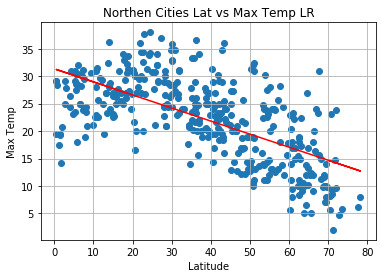

In [51]:
sctplt(north_df['Lat'],north_df['Max Temp'],title='Northen Cities Lat vs Max Temp LR',ylabel='Max Temp',xlabel='Latitude',save='north_lat_vs_temp_lr.png',linreg=True,rsqr=True)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8


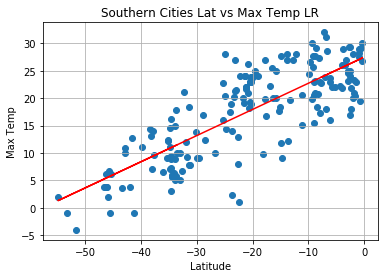

In [52]:
sctplt(south_df['Lat'],south_df['Max Temp'],title='Southern Cities Lat vs Max Temp LR',ylabel='Max Temp',xlabel='Latitude',save='south_lat_vs_temp_lr.png',linreg=True,rsqr=True)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.06


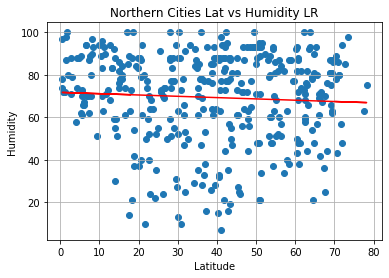

In [53]:
sctplt(north_df['Lat'],north_df['Humidity'],title='Northern Cities Lat vs Humidity LR',ylabel='Humidity',xlabel='Latitude',save='north_lat_vs_hum_lr.png',linreg=True,rsqr=True)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11


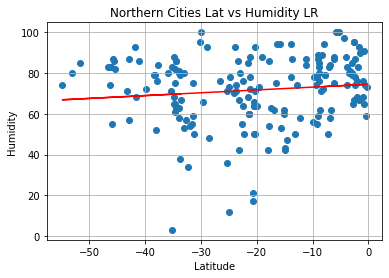

In [54]:
sctplt(south_df['Lat'],south_df['Humidity'],title='Northern Cities Lat vs Humidity LR',ylabel='Humidity',xlabel='Latitude',save='south_lat_vs_hum_lr.png',linreg=True,rsqr=True)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.05


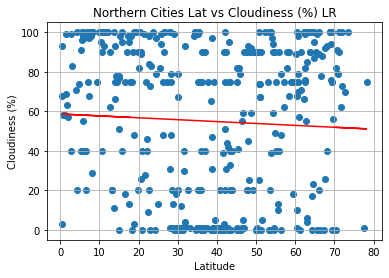

In [55]:
sctplt(north_df['Lat'],north_df['Cloudiness'],title='Northern Cities Lat vs Cloudiness (%) LR',ylabel='Cloudiness (%)',xlabel='Latitude',save='north_lat_vs_cloud_lr.png',linreg=True,rsqr=True)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06


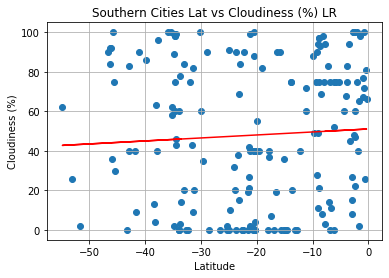

In [56]:
sctplt(south_df['Lat'],south_df['Cloudiness'],title='Southern Cities Lat vs Cloudiness (%) LR',ylabel='Cloudiness (%)',xlabel='Latitude',save='south_lat_vs_cloud_lr.png',linreg=True,rsqr=True)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.01


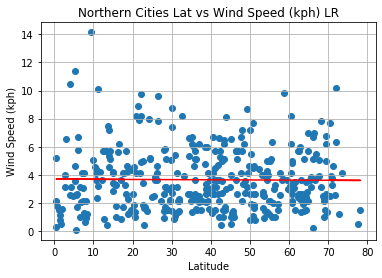

In [57]:
sctplt(north_df['Lat'],north_df['Wind Speed'],title='Northern Cities Lat vs Wind Speed (kph) LR',ylabel='Wind Speed (kph)',xlabel='Latitude',save='north_lat_vs_wind_lr.png',linreg=True,rsqr=True)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.18


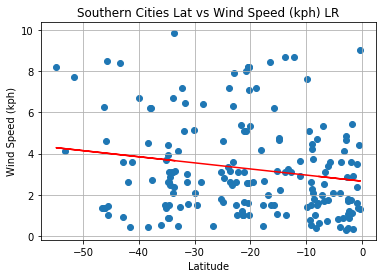

In [58]:
sctplt(south_df['Lat'],south_df['Wind Speed'],title='Southern Cities Lat vs Wind Speed (kph) LR',ylabel='Wind Speed (kph)',xlabel='Latitude',save='south_lat_vs_wind_lr.png',linreg=True,rsqr=True)
plt.show()